# Introdução ao Aprendizado de Máquina

Aprendizado de Máquina (ou *Machine Learning* em inglês) se trata de extrair conhecimentos a partir de um conjunto de dados. É um campo de pesquisa que une estatística, inteligência artificial e ciências da computação. Também é conhecida como análise preditiva ou aprendizado estatístico (MÜLLER e GUIDO, 2016). 

A forma de aprendizagem pode ser dividida em três principais grupos:
    - Aprendizagem supervisionada ( ou *Supervised learning*)
    - Aprendizagem não supervisionada (ou *Unsupervised learning*)
    - Aprendizagem por reforço (ou *Reinforcement learning*)
    
Mais a frente será visto um exemplo de aprendizagem supervisionada. Neste tipo de aprendizagem, o algorítmo aprende de um conjunto de dados associados à resposta alvo, ou variável *target*. A aprendizagem supervisionada se assemelha bastante ao aprendizado humano (MUELER e MASSARON, 2016). O algorítmo aprende o padrão de resposta de um conjunto chamado de "dados de treino" e é aplicado a outro conjunto chamado de "dados de teste". Em diversos casos é conveniente dividir os dados de treino em duas novas partes: 
    - Dados de treino: usados para treinar o modelo efetivamente.
    - Dados de validação: usados para realizar a validação do modelo.
 
A técnica de aprendizagem supervisionada pode ser usada independente da escala da aplicação e depende apenas que dados onde a variável *target* se encontre sejam fornecidos como referência e que os dados coletados possam ser relacionados com a resposta alvo em si. Neste artigo veremos um exemplo de como usar o aprendizado de máquina supervisionado para realizar previsões do preço médio de casas na Califórnia na década de 90 a partir de uma série de dados.

Para atingir o objetivo do artigo, usaremos os dados compartilhados pelo usuário Cam Nugent da Kaggle: [clique aqui para acessar a página com os dados](https://www.kaggle.com/camnugent/california-housing-prices/version/1?select=housing.csv).

# Importando as bibliotecas que serão usadas

Antes de mais nada, serão importadas as bibliotecas que serão usadas nesse artigo. Há um breve comentário sobre a função das mesmas acima de cada uma delas.

In [1]:
# Importando as bibliotecas

# Usado para o processamento de arrays e matrizes
import numpy as np 

# Usado para criar e manipular dataframes
import pandas as pd 

# Usado para criar gráficos
import matplotlib.pyplot as plt 

# Usado para tornar a ordem dos dados aleatória
from sklearn.utils import shuffle 

# Algorítmos de regressão
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Função para normalização e codificação dos dados, respectivamente
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Funções com métricas de performance
from sklearn.metrics import mean_squared_error, r2_score

# Função para realizar a validação cruzada
from sklearn.model_selection import cross_val_score

# Realizando a leitura dos dados

Pode-se usar a função read_csv(filepath_or_buffer, sep=', ', ...) do [pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) para realizar a leitura e armazenar os dados em uma variável. A função, quando não especificado o separador (sep='...'), considera o separador padrão que é a vírgula ",". É imporante sempre verificar qual o separador do arquivo que será lido pela função para evitar problemas.

In [2]:
# Importando os dados
df = pd.read_csv("housing.csv")

# Mostrando as cinco primeiras colunas do dataframe
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Atributos do conjunto de dados para cada região:

- As variáveis *longitude* e *latitude* são relacionadas a localização geográfica.
- *housing_median_age* reprensenta a idade média das casas.
- *total_rooms* representa o número total de cômodos (média) das casas.
- *total_bedrooms* representa o número total de quartos (média) das casas.
- *population* representa a média de população.
- *households* representa o número médio de famílias.
- *median_income* representa o salário médio das famílias.
- *median_house_value* é nossa variável *target* e representa o valor médio das casas.
- *ocean_proximity* é uma variável categórica que mostra o quão próximo da costa as casas se encontram.

Conseguimos ver a quantidade de categorias dentro de cada variável. Para isso, usaremos o código abaixo.

In [3]:
for item in df.columns:
    df_ = df[item].value_counts().sort_index()
    print('Distribuição dos dados por %s: ' %(item))
    print(df_, end='\n\n')

Distribuição dos dados por longitude: 
-124.35    1
-124.30    2
-124.27    1
-124.26    1
-124.25    1
          ..
-114.56    1
-114.55    1
-114.49    1
-114.47    1
-114.31    1
Name: longitude, Length: 844, dtype: int64

Distribuição dos dados por latitude: 
32.54     1
32.55     3
32.56    10
32.57    18
32.58    26
         ..
41.84     1
41.86     3
41.88     1
41.92     1
41.95     2
Name: latitude, Length: 862, dtype: int64

Distribuição dos dados por housing_median_age: 
1.0        4
2.0       58
3.0       62
4.0      191
5.0      244
6.0      160
7.0      175
8.0      206
9.0      205
10.0     264
11.0     254
12.0     238
13.0     302
14.0     412
15.0     512
16.0     771
17.0     698
18.0     570
19.0     502
20.0     465
21.0     446
22.0     399
23.0     448
24.0     478
25.0     566
26.0     619
27.0     488
28.0     471
29.0     461
30.0     476
31.0     458
32.0     565
33.0     615
34.0     689
35.0     824
36.0     862
37.0     537
38.0     394
39.0     369
40.0  

Também é possível ver o tipo de cada categoria (ou variável). É importante saber o tipo da variável para realizar o tratamento adequado aos valores faltantes/nulos (*NaN* acrônimo em inglês para *Not a Number*). No caso de variáveis numéricas (discretas ou contínuas), pode-se usar a média para preencher os valores nulos, enquanto em variáveis categóricas (nominais ou ordinais), faz mais sentido usar a moda. Ainda, pode-se excluir as linhas que apresentam os dados nulos em si.

In [4]:
tipos = df.dtypes
print(tipos)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


Para a variável categórica 'ocean_proximity', usaremos o método de pré processamento chamado One Hot Encoder para codificar a variável categória em um array numérico.

# Tratamento de dados nulos

Agora será realizada a verificação e tratamento dos dados nulos do conjunto de dados para realizar o tratamento adequado, como comentado anteriormente.

In [5]:
# Porcentagem de dados nulos separados por categorias
print('Porcentagem de dados nulos por categoria:')
round((df.isnull().sum()/df.shape[0])*100, 3)

Porcentagem de dados nulos por categoria:


longitude             0.000
latitude              0.000
housing_median_age    0.000
total_rooms           0.000
total_bedrooms        1.003
population            0.000
households            0.000
median_income         0.000
median_house_value    0.000
ocean_proximity       0.000
dtype: float64

Antes de realizar o tratamento, iremos verificar como a variável é dependente da localidade. Para isso, faremos um gráfico de dispersão entre as variáveis longitude e latitude e iremos inserir a variável '*total_bedrooms*' como cor. As localidades em que aparecem pontos vermelhos são as regiões com o maior número de quartos, enquanto as regiões em azul indicam localidades com os menores números de quartos no total.

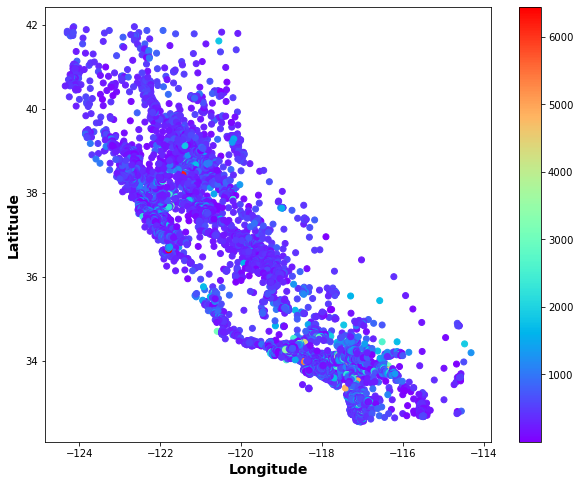

In [6]:
# Criando gráfico de dispersão entre a posição geográfica (longitude x latitude)
# com informação do valor da variável 'total_bedrooms' (barra de cor)
plt.figure(figsize=[10,8])
plt.scatter(df['longitude'], df['latitude'], c=df['total_bedrooms'], cmap=plt.cm.rainbow)
plt.colorbar()
plt.xlabel('Longitude', fontsize=14, fontweight='bold')
plt.ylabel('Latitude', fontsize=14, fontweight='bold')
plt.show()

A partir do gráfico, conseguimos verificar que a maior parte dos dados apresentam um valor para a variável '*total_bedrooms*' menor que 1000. Com isso em mente, vemos que a localidade não influencia no número de quartos e preencheremos os valores nulos com a média da variável.

In [7]:
media_total_bedrooms = round(df['total_bedrooms'].mean(),0)
print('A média de "total_bedrooms" é: %d' %(media_total_bedrooms))

df.total_bedrooms.fillna(media_total_bedrooms, inplace=True)

A média de "total_bedrooms" é: 538


# Pré processamento dos dados

Nessa parte, será realizado o pré processamento dos dados, tais como a normalização e a codificação das variáveis categóricas.

## One Hot Encoder: Codificação de variáveis categóricas

In [8]:
# Instanciando a função OneHotEncoder
ohe = OneHotEncoder()

# Retorna a variável categórica codificada
var = ohe.fit_transform(df[['ocean_proximity']]).toarray()

# Retorna o nome das colunas
nome_col = ohe.categories_[0]

Após isso, podemos remover a coluna da variável categórica e inserir as 5 novas colunas da variável codificada.

In [9]:
# Removendo a coluna da variável categórica, a opção axis='1' é usada para se referir a coluna e a opção inplace=True
#indica que a informação será salva na variável original, ou seja, na própria variável df.
df.drop('ocean_proximity', axis=1, inplace=True)

# Imprimindo a tabela sem a coluna 'ocean_proximity'
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [10]:
# Guardaremos o nome das colunas do dataframe acima e das categorias em uma lista
nome_colunas = []
for item in df.columns:
    nome_colunas.append(item)

for item in nome_col:
    nome_colunas.append(item)
    
# Criando um dataframe com as variáveis numéricas e as variáveis codificadas
df = pd.DataFrame(np.c_[df, var])

# Renomeando as colunas
df.columns = nome_colunas

# Imprimindo a nova tabela
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


Através do One Hot Encoder foi possível criar cinco novas colunas a partir das categorias da coluna 'ocean_proximity'. 

Para a primeira linha, por exemplo, percebe-se que no conjunto de dados original, havia a informação 'NEAR BAY' na coluna 'ocean_proximity'. Para o conjunto de dados acima, tem-se as cinco categorias separadas em colunas, com valores zero em todas elas, exceto na coluna 'NEAR BAY'. Isso mostra que a codificação consegue transformar uma variável categórica em variáveis numéricas, mantendo a informação original. É importante notar que em nenhuma hipósete haverá mais do que um valor "1" por linha nas colunas codificadas.

## Normalização

A normalização das variáveis numéricas será feita através da Normalização Padrão. Para isso, usaremos a função StandardScaler da biblioteca scikit-learn. A normalização será feita em todas as variáveis numéricas (com exceção das que foram transformadas pelo método One Hot Encoder e da variável *target* '*median_house_value*').

Em alguns casos, quando não se utiliza a normalização das variáveis, os resultados obtidos podem ser afetados negativamente. Para o conjunto de dados neste artigo, apesar de não ser demonstrado, caso a normalização não seja feita, vemos uma piora no ajuste dos modelos.

In [12]:
# Guardando o nome das colunas que serão normalizadas
nome_col_norm = []

for item in df.columns:
    if (item != 'median_house_value'):
        nome_col_norm.append(item)
    else:
        break

In [13]:
# Instanciando a função StandardScaler
ss = StandardScaler()

# Normalizando as variáveis
variaveis_normalizadas = ss.fit_transform(df[nome_col_norm])

# Criando uma cópia do dataframe original
df_norm = df.copy()

# Inserindo os valores normalizados no dataframe
df_norm = pd.DataFrame(np.c_[variaveis_normalizadas, df.median_house_value.values, var])
df_norm.columns = nome_colunas

# Imprimindo as primeiro cinco linhas do dataframe normalizado
df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975231,-0.974429,-0.977033,2.344766,452600.0,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.355085,0.861439,1.669961,2.332238,358500.0,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829735,-0.820777,-0.843637,1.782699,352100.0,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722402,-0.766028,-0.733781,0.932968,341300.0,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615070,-0.759847,-0.629157,-0.012881,342200.0,0.0,0.0,0.0,1.0,0.0


Para implementar um modelo de aprendizagem supervisionada, deve-se entender os dados que são fornecidos. Nesse caso, Queremos obter uma relação entre o preço médio das casas (*median_house_value*) - variável *target*, com as variáveis independentes (*longitude*, *latitude*, ...). Podemos usar o índice de correlação de Pearson para verificar quais variáveis influenciam mais na variável target.

In [14]:
# Retorna o índice de correlação de Pearson
ind_cor = df_norm.corr()['median_house_value']

print('\033[1m' + 'ÍNDICE DE CORRELAÇÃO DE PEARSON:' + '\033[0m')
for item1, item2 in zip(ind_cor.index, ind_cor.values):
    if (item1 != 'median_house_value'):
        print('\033[1m' + item1 + '\033[0m: ' + str(round(item2,3)), end='\n')

ÍNDICE DE CORRELAÇÃO DE PEARSON:
longitude: -0.046
latitude: -0.144
housing_median_age: 0.106
total_rooms: 0.134
total_bedrooms: 0.049
population: -0.025
households: 0.066
median_income: 0.688
<1H OCEAN: 0.257
INLAND: -0.485
ISLAND: 0.023
NEAR BAY: 0.16
NEAR OCEAN: 0.142


O índice de correlação de Pearson indica o quanto uma variável independente influencia na variável *target* (no caso dos dados acima). O índice pode assumir valores na faixa de -1 < i < 1. Coeficientes positivos, como no caso da variável '*median_house*', indicam que incrementos no valor da variável irá gerar um aumento na variável *target*. Por outro lado, para coeficientes negativos, como o da variável '*INLAND*', um incrimento no valor da variável irá provocar uma diminuição na variável *target*. 

# Separação dos dados em dados de treino e dados de teste

Para realizar a separação dos dados, usaremos a função dividirDados.

### Informações sobre a função *dividirDados*:

__Resumo__: A função embaralha os dados de um dataframe de entrada de forma aleatória e retorna dois dataframes: um para treino e um para teste de modelos de aprendizado de máquina.

- Parâmetros de entrada: __df___ e __p__
    - __df___ é o dataframe de entrada;
    - __p__ é a porcentagem do número de linhas que será usado para criar os dados de treino, onde __0 < p < 1__.
    
- Parâmetros de saída: A função retornará dois dataframes, logo, deve-se declarar duas variáveis ao instanciar a função.
    - __df_treino__: dataframe com os dados para treino do modelo
    - __df_teste__: dataframe com os dados para teste do modelo.
    
Caso o segundo parâmetro de entrada "p" não seja informado ao instanciar a função, será considerado o valor padrão p = 0.80. Ou seja, 80% das linhas serão usadas para criar o dataframe de treino (df_treino) e o restante para o dataframe de teste (df_teste).

In [15]:
# Função para dividir os dados
def dividirDados(df_, p = 0.80):
    # Embaralhando o dataframe de forma aleatória.
    df_ = shuffle(df_)
    
    # Dividindo o dataframe em dados para treino e teste
    df_treino = df_.iloc[:int(round(df_.shape[0] * p, 0)), :]
    df_teste = df_.iloc[int(round(df_.shape[0] * p, 0)):, :]
    
    print('O \033[1mdataframe original\033[0m possui \033[1m%d linhas\033[0m e \033[1m%d colunas\033[0m.' %(df_.shape[0], df_.shape[1]), end='\n\n')
    
    print('\033[1mINFORMAÇÕES SOBRE O PROCESSAMENTO: \033[0m', end='\n')
    print('O dataframe de treino poussi \033[1m%d linhas\033[0m e \033[1m%d colunas\033[0m.' %(df_treino.shape[0], df_treino.shape[1]), end='\n')
    print('O dataframe de teste poussi \033[1m%d linhas\033[0m e \033[1m%d colunas\033[0m.' %(df_teste.shape[0], df_teste.shape[1]), end='\n')
    print('A soma do número de \033[1mlinhas\033[0m dos dataframes de treino e de teste é \033[1m%d\033[0m.' %(df_treino.shape[0] + df_teste.shape[0]))
    
    return df_treino, df_teste

# Criando os dataframes de treino e teste a partir do original usando a função divide_dados. 
df_treino, df_teste = dividirDados(df_norm)

O dataframe original possui 20640 linhas e 14 colunas.

INFORMAÇÕES SOBRE O PROCESSAMENTO: 
O dataframe de treino poussi 16512 linhas e 14 colunas.
O dataframe de teste poussi 4128 linhas e 14 colunas.
A soma do número de linhas dos dataframes de treino e de teste é 20640.


## Separando as variáveis independentes da variável dependente

Para isso, usaremos a função separarVar.

### Informações sobre a função *separarVar*:

__Resumo__: A função serapara as variáveis independentes da variável dependente. Para isso, deve-se instanciar a função através de duas variáveis. O parâmetro de entrada é um dataframe.

- Parâmetros de entrada: __df___
    - __df___ é o dataframe de entrada: pode ser referente aos dados de treino, ou aos dados de teste;
    
- Parâmetros de saída: A função retornará dois arrays, logo, deve-se declarar duas variáveis ao instanciar a função.
    - __X__: Variáveis independentes
    - __Y__: Variável dependente (variável *target*)

In [16]:
# Função para separar as variáveis independentes da variável dependente.
def separarVar(df_):
    verificador = True
    # Loop para separar as variáveis independentes da variável dependente
    for item in df_.columns:
        if (verificador):
            X = df_[item].values.reshape(-1,1)
            verificador = False
        else:
            if (item != 'median_house_value'):
                X = np.c_[X, df_[item].values.reshape(-1,1)]
            else:
                Y = df_[item].values.reshape(-1,1)
            
    # Transformando a lista para um numpy array
    
    return X, Y # Dados de saída

In [17]:
# Separando as variáveis
Xtreino, Ytreino = separarVar(df_treino)
Xteste, Yteste = separarVar(df_teste)

# Criando dois vetores para representar quando o valor target seja igual ao valor predito.
x = y = np.arange(0, 500001, 100000)

Com isso, temos as variáveis independentes separadas da variável independente, tanto para o dataframe de treino, quanto para o dataframe de teste.

# Algorítmos de regressão

Serão testados dois algorítmos de regressão: o modelo de Regressão Linear Múltipla e o modelo K-Nearest Neighbours. Para isso, usaremos os a biblioteca scikit-learn que já traz ambos os modelos implementados. Para verificar a precisão dos modelos usaremos duas métricas: RMSE (*Root Mean Square Error* do inglês) e R$^2$ (Coeficiente de correlação).

## Métricas

O __RMSE__ representa a raiz quadrada da soma dos quadrados da diferença entre o valor target e o valor predito dividido pelo número de observações. Quanto menor for o valor de RMSE, menor será a dispersão do valor predito em relação ao valor target.

O coeficiente de correlação __R$^2$__ pode ser obtido pela equação 1 - $SQ_{total}$/$SQ_{resíduos}$, onde $SQ_{total}$ é a soma dos quadrados da diferença entre a média e o valor observado e $SQ_{resíduos}$ é a soma dos quadrados da diferença entre a média e o valor predito. Se R$^2$ for positivo e próximo de 1, signifca que o modelo apresentou um bom ajuste aos dados testado.

Com isso em mente, deve-se buscar um modelo que apresente um baixo valor para RMSE e um valor próximo de 1 para R$^2$.

## Regressão Linear Múltipla

In [18]:
# Instanciando o modelo de regressão linear
lin_reg = LinearRegression()

# Treinando o modelo com os dados de treino:
lin_reg.fit(Xtreino, Ytreino)

rmse_lin_reg = round(np.sqrt(mean_squared_error(Ytreino, lin_reg.predict(Xtreino))),2)
r2_lin_reg = round(r2_score(Ytreino, lin_reg.predict(Xtreino)),2)

print('Modelo: Regressão Linear Múltipla', end=' | ')
print('RMSE: %s' %(str(rmse_lin_reg)), end=' | ')
print('R2: %s' %(str(r2_lin_reg)), end='\n')

Modelo: Regressão Linear Múltipla | RMSE: 68415.07 | R2: 0.65


Podemos ver o comportamento das predições graficando o valor *target* em função do valor predito.

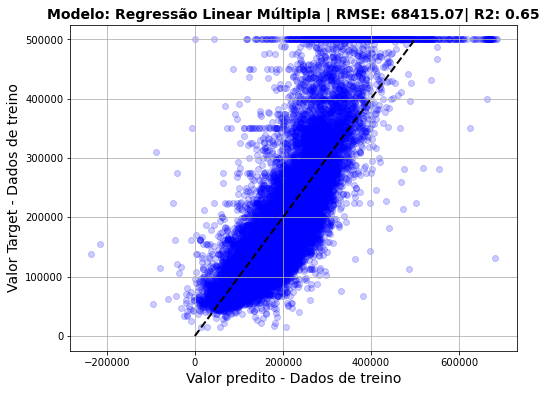

In [19]:
# Criando um gráfico para o modelo de regressão linear múltipla
plt.figure(figsize=[8,6])
plt.scatter(lin_reg.predict(Xtreino), Ytreino, alpha=0.2, c='blue')
plt.title('Modelo: Regressão Linear Múltipla' + ' | RMSE: ' + str(rmse_lin_reg) + '| R2: ' + str(r2_lin_reg), fontsize = 14, fontweight = 'bold')
plt.xlabel("Valor predito - Dados de treino", fontsize = 14)
plt.ylabel("Valor Target - Dados de treino", fontsize = 14)
plt.grid()

#inserindo a reta onde o valor predito é igual ao valor target
plt.plot(x, y, c = 'black', lw = 2, ls='--')
plt.show()

## K-Nearest Neighbors

Para o modelo KNN, devemos entrar com um hiperparâmetro que é o número de vizinhos.

In [20]:
# Número de vizinhos que serão testados no modelo KNN
num_vizinhos = np.arange(1, 12, 2)
    
for item in num_vizinhos:
    # Instandiando o modelo KNN
    knn = KNeighborsRegressor(n_neighbors=item)

    # Treinando o modelo com os dados de treino:
    knn.fit(Xtreino, Ytreino)

    rmse_knn = round(np.sqrt(mean_squared_error(Ytreino, knn.predict(Xtreino))),2)
    r2_knn = round(r2_score(Ytreino, knn.predict(Xtreino)),2)
        
    print('Modelo: K-Nearest Neighbors K = %d' %(item), end=' | ')
    print('RMSE: %s' %(str(rmse_knn)), end=' | ')
    print('R2: %s' %(str(r2_knn)), end='\n')

Modelo: K-Nearest Neighbors K = 1 | RMSE: 0.0 | R2: 1.0
Modelo: K-Nearest Neighbors K = 3 | RMSE: 44156.25 | R2: 0.85
Modelo: K-Nearest Neighbors K = 5 | RMSE: 49329.55 | R2: 0.82
Modelo: K-Nearest Neighbors K = 7 | RMSE: 51723.53 | R2: 0.8
Modelo: K-Nearest Neighbors K = 9 | RMSE: 53113.32 | R2: 0.79
Modelo: K-Nearest Neighbors K = 11 | RMSE: 54225.86 | R2: 0.78


Através das duas métricas consideradas, percebe-se que o modelo KNN se ajusta melhor aos dados, uma vez que apresenta menor RMSE e maior R$^2$. Podemos verificar por meio de gráficos o quão bem os modelos representam o dados de treino.

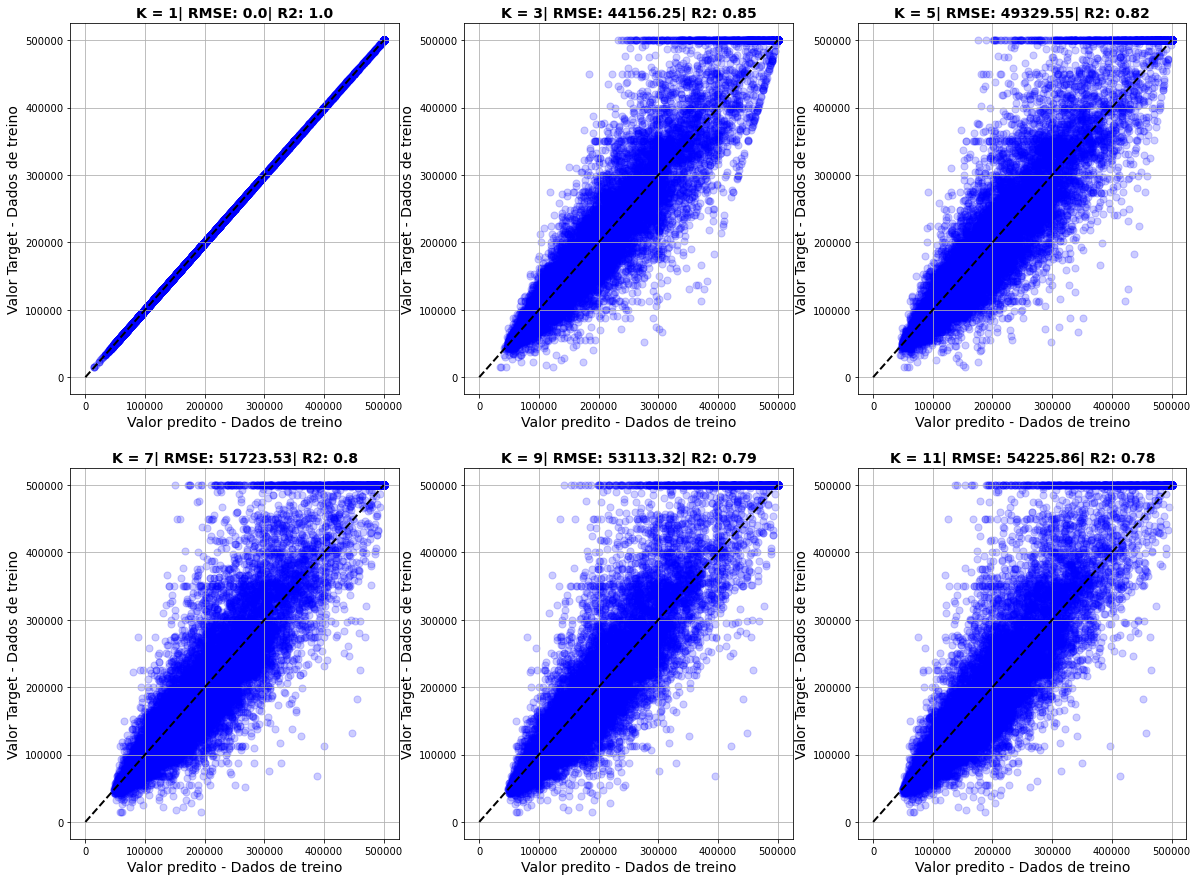

In [21]:
# Plotando alguns gráficos para verificar visualmente a dispersão do resultado.
plt.figure(figsize=[20,15])

i = 1
for item in num_vizinhos:
    knn = KNeighborsRegressor(n_neighbors = item).fit(Xtreino, Ytreino)
    rmse_knn = round(np.sqrt(mean_squared_error(Ytreino, knn.predict(Xtreino))),2)
    r2_knn = round(r2_score(y_true = Ytreino, y_pred = knn.predict(Xtreino)),2)
    
    plt.subplot(2,3,i)
    plt.title('K = ' + str(item) + '| RMSE: ' + str(rmse_knn) + '| R2: ' + str(r2_knn), fontsize = 14, fontweight = 'bold')
    plt.scatter(knn.predict(Xtreino), Ytreino, alpha=0.2, s=50, c='blue')
    plt.plot(x, y, lw=2, c ='black', ls='--')
    plt.xlabel('Valor predito - Dados de treino', fontsize = 14)
    plt.ylabel('Valor Target - Dados de treino', fontsize = 14)
    plt.grid()
    i += 1

plt.show()

Além disso, através dos gráficos é possíve verificar que os modelos KNN testados não retornam valores negativos para o valor predito, como ocorre para o modelo de Regressão Linear Múltipla. Antes de prosseguir e aplicar os modelos aos dados de teste, realizaremos a validação cruzada.

# Validação Cruzada



A validação cruzada é um método estatístico usado para avaliar o desempenho de modelos que é mais estável e completo que a divisão normal entre dados de treino e dados de teste. A versão mais usada de validação cruzada é chamada de *k-folds* (ou k-dobras), onde *k* é um número especificado pelo usuário, o qual, assume-se igual a 5 ou 10 na grande maioria dos casos. (MÜLLER e GUIDO, 2016).

O método consiste em separar os dados de treino em *k* partes de mesmo tamanho, das quais *k-1* dobras são usadas para treinamento e a uma é usada para a validação do modelo. Isso é feito *k* vezes e a precisão é avaliada para cada uma das vezes.

A biblioteca scikit-learn traz a implementação desse método através da função cross_val_score(estimator = Modelo de Regressão, X = Variáveis independentes dos dados de treino, y = Variável target dos dados de treino, cv = 5 (número de folds), scoring = 'r2' (métrica para avaliação)).

# Regressão Linear Múltipla

In [30]:
# Instanciando a função para a validação cruzada
cv_lin_reg = cross_val_score(estimator = LinearRegression(), 
                             X = Xtreino, 
                             y = Ytreino, 
                             cv = 5, 
                             scoring = 'r2')
i = 1
for item in cv_lin_reg:
    print('Fold: ' + str(i) + ' | R2: ' + str(round(item,2)), end='\n')
    i += 1

print('Média   | R2: ' + str(round(cv_lin_reg.mean(),3)))
print('Desvio padrão: ' + str(round(cv_lin_reg.std(),3)))

Fold: 1 | R2: 0.65
Fold: 2 | R2: 0.64
Fold: 3 | R2: 0.66
Fold: 4 | R2: 0.64
Fold: 5 | R2: 0.66
Média   | R2: 0.649
Desvio padrão: 0.009


# K-Nearest Neighbors

In [33]:
# Instanciando a função para a validação cruzada
for item in num_vizinhos:
    cv_knn = cross_val_score(estimator = KNeighborsRegressor(n_neighbors = item), 
                             X = Xtreino, 
                             y = Ytreino, 
                             cv = 5, 
                             scoring = 'r2')
    print('Número de vizinhos :' + str(item))
    i = 1
    for item in cv_knn:
        print('Fold: ' + str(i) + ' | R2: ' + str(round(item,2)), end='\n')
        i += 1

    print('Média   | R2: ' + str(round(cv_knn.mean(),3)))
    print('Desvio padrão: ' + str(round(cv_knn.std(),3)), end='\n\n')

Número de vizinhos :1
Fold: 1 | R2: 0.57
Fold: 2 | R2: 0.56
Fold: 3 | R2: 0.59
Fold: 4 | R2: 0.58
Fold: 5 | R2: 0.58
Média   | R2: 0.575
Desvio padrão: 0.011

Número de vizinhos :3
Fold: 1 | R2: 0.71
Fold: 2 | R2: 0.69
Fold: 3 | R2: 0.7
Fold: 4 | R2: 0.69
Fold: 5 | R2: 0.7
Média   | R2: 0.697
Desvio padrão: 0.006

Número de vizinhos :5
Fold: 1 | R2: 0.73
Fold: 2 | R2: 0.71
Fold: 3 | R2: 0.72
Fold: 4 | R2: 0.71
Fold: 5 | R2: 0.72
Média   | R2: 0.719
Desvio padrão: 0.007

Número de vizinhos :7
Fold: 1 | R2: 0.74
Fold: 2 | R2: 0.72
Fold: 3 | R2: 0.73
Fold: 4 | R2: 0.72
Fold: 5 | R2: 0.72
Média   | R2: 0.726
Desvio padrão: 0.007

Número de vizinhos :9
Fold: 1 | R2: 0.73
Fold: 2 | R2: 0.72
Fold: 3 | R2: 0.73
Fold: 4 | R2: 0.72
Fold: 5 | R2: 0.73
Média   | R2: 0.728
Desvio padrão: 0.006

Número de vizinhos :11
Fold: 1 | R2: 0.74
Fold: 2 | R2: 0.72
Fold: 3 | R2: 0.73
Fold: 4 | R2: 0.72
Fold: 5 | R2: 0.73
Média   | R2: 0.728
Desvio padrão: 0.006



Considerando os resultados de ambas as validações, vemos que o modelo KNN com 9 vizinhos é o que apresenta maior consistência (uma vez que o modelo para 11 vizinhos apresentou o mesmo valor), uma vez que a média R$^2$ é a maior. Com isso em mente. Iremos realizar o ajuste do modelo KNN para 9 vizinhos e usaremos os dados de teste, finalmente.

# Realizando previsões com os dados de teste

Modelo: K-Nearest Neighbors K = 9 | RMSE: 60852.65 | R2: 0.72


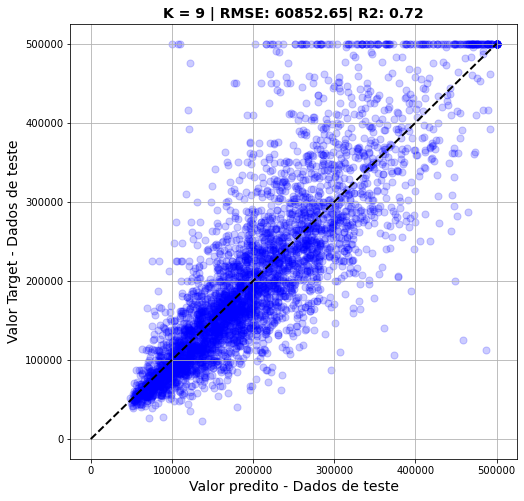

In [36]:
# Instandiando o modelo KNN com 9 vizinhos
knn = KNeighborsRegressor(n_neighbors=9)

# Treinando o modelo com os dados de treino:
knn.fit(Xtreino, Ytreino)

rmse_knn = round(np.sqrt(mean_squared_error(Yteste, knn.predict(Xteste))),2)
r2_knn = round(r2_score(Yteste, knn.predict(Xteste)),2)
        
print('Modelo: K-Nearest Neighbors K = 9', end=' | ')
print('RMSE: %s' %(str(rmse_knn)), end=' | ')
print('R2: %s' %(str(r2_knn)), end='\n')

# Criando um gráfico para avaliar o resultado
plt.figure(figsize=[8,8])
plt.title('K = 9' + ' | RMSE: ' + str(rmse_knn) + '| R2: ' + str(r2_knn), fontsize = 14, fontweight = 'bold')
plt.scatter(knn.predict(Xteste), Yteste, alpha=0.2, s=50, c='blue')
plt.plot(x, y, lw=2, c ='black', ls='--')
plt.xlabel('Valor predito - Dados de teste', fontsize = 14)
plt.ylabel('Valor Target - Dados de teste', fontsize = 14)
plt.grid()
plt.show()

Aplicando o modelo treinado aos dados de teste, percebe-se que o mesmo se ajusta bem, uma vez que a dispersão ocorre ao redor da linha preta tracejada (a qual indica quando o valor predito é igual ao valor *target*).

# Conclusão

Foram discutidas a importância da interpretação e entendimento dos dados, assim como algumas métricas que podem ser avaliadas para verificar o quão bem o modelo se ajusta aos dados.

Pode-se usar a validação cruzada, que é um método de avaliação de desempenho do modelo que traz maior segurança ao cientista de dados, uma vez que se utiliza o próprio conjunto de dados de treino para fazer uma primeira validação. Na maioria dos casos, quando o modelo se ajusta bem na validação cruzada, ele se ajustará bem nos dados de teste.

Para os dados em questão, foi possível observar que o modelo KNN com nove (9) vizinhos apresentou o melhor ajuste, com valores de R$^2 = 0,728$ para os dados de treino e R$^2 = 0,72$ para os dados de teste. É importante notar que, apesar de não ter sido mostrado neste artigo, a normalização das variáveis numéricas melhorou o desempenhos dos modelos quando comparado ao uso das variáveis sem a normalização. Um cuidado que deve-se tomar é a utilização da função padronizadora para transformar os dados para realizar a predição.

# Referências

MÜLLER, A. C., GUIDO, S., Introduction to Machine Learning with Python: A Guide for Data Scientistis. 1st Ed, Gravenstein Highway North, Sebastopol: O'Reilly, 2016.

MUELLER, J. P., MASSARON, L., Machine Learning for dummies, River Street, Hoboken: John Wiley & Sons, Inc, 2016.

NUGENT, C., California Housing Prices, Kaggle. Link para acesso: https://www.kaggle.com/camnugent/california-housing-prices/version/1?select=housing.csv

STATISTICS HOW TO, What is Pearson Correlation?. Link para acesso: https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/